In [1]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import Dense
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_valid,y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
type(y_train)

numpy.ndarray

In [6]:
y_valid.shape


(10000,)

In [7]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

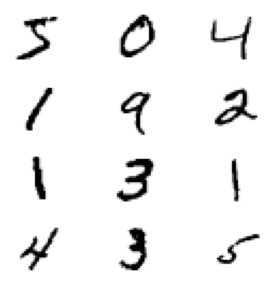

In [8]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(4, 3, k+1)   
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')

plt.show()

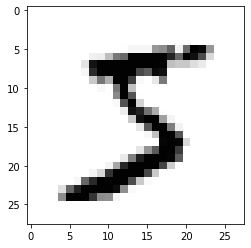

In [9]:
plt.imshow(X_train[0],cmap="Greys")

In [10]:
X_train=X_train.reshape(60000,784).astype('float32' )
X_valid=X_valid.reshape(10000,784).astype('float32' )  

In [11]:
# preprocessing

X_train=X_train/255
X_valid=X_valid/255

In [12]:
X_train[2]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
X_valid

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
# one hot representation

import keras.utils as np_utils
np_class=10
y_train=keras.utils.np_utils.to_categorical(y_train,np_class)
y_valid=keras.utils.np_utils.to_categorical(y_valid,np_class)


In [15]:
model=Sequential()
model.add(Dense(64,activation='sigmoid',input_shape=(784,)))


In [16]:
model.add(Dense(10,activation='softmax'))


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [18]:
# compile the network

model.compile(loss='mean_squared_error',optimizer=SGD(learning_rate=0.01),metrics=['accuracy'])

In [19]:
hist=model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=2)

Epoch 1/10
469/469 - 2s - loss: 0.0949 - accuracy: 0.1008 - 2s/epoch - 4ms/step
Epoch 2/10
469/469 - 1s - loss: 0.0921 - accuracy: 0.1035 - 1s/epoch - 3ms/step
Epoch 3/10
469/469 - 1s - loss: 0.0909 - accuracy: 0.1101 - 1s/epoch - 3ms/step
Epoch 4/10
469/469 - 1s - loss: 0.0902 - accuracy: 0.1298 - 1s/epoch - 3ms/step
Epoch 5/10
469/469 - 1s - loss: 0.0897 - accuracy: 0.1768 - 1s/epoch - 2ms/step
Epoch 6/10
469/469 - 1s - loss: 0.0893 - accuracy: 0.2354 - 1s/epoch - 3ms/step
Epoch 7/10
469/469 - 2s - loss: 0.0889 - accuracy: 0.2859 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0886 - accuracy: 0.3208 - 2s/epoch - 4ms/step
Epoch 9/10
469/469 - 2s - loss: 0.0882 - accuracy: 0.3459 - 2s/epoch - 4ms/step
Epoch 10/10
469/469 - 2s - loss: 0.0879 - accuracy: 0.3638 - 2s/epoch - 4ms/step


In [22]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy'])


In [23]:
print(hist.history.values())

dict_values([[0.09490606933832169, 0.09211279451847076, 0.09092243760824203, 0.09023299068212509, 0.08973132818937302, 0.08931051939725876, 0.08892754465341568, 0.08856312930583954, 0.08820794522762299, 0.08785758912563324], [0.1007833331823349, 0.10351666808128357, 0.11006666719913483, 0.12983334064483643, 0.17675000429153442, 0.23538333177566528, 0.2858833372592926, 0.3207833468914032, 0.3458999991416931, 0.36375001072883606]])


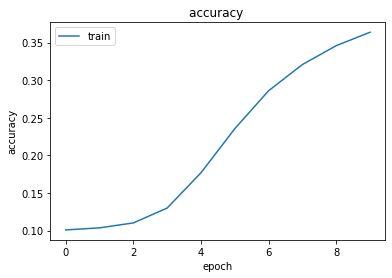

In [27]:
plt.plot(hist.history['accuracy'])
plt.title('accuracy ')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train'],loc='best')
plt.show()

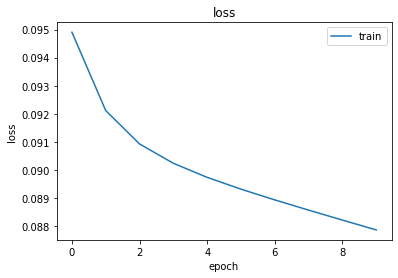

In [28]:
plt.plot(hist.history['loss'])
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'],loc='best')
plt.show()